https://ai.google.dev/gemini-api/docs/get-started/python?hl=pt-br

In [3]:
pip install -q -U google-generativeai


141.03s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


Note: you may need to restart the kernel to use updated packages.


In [66]:
import requests
import json
import os

url = "https://ai.google.dev/v1/models/gemini/text"
api_key = os.getenv("GEMINI_API_KEY")


payload = {
    "text": "Sua consulta aqui",
    "key": api_key,
    "response_format": "json"  # Adicione este parâmetro
}

response = requests.post(url, json=payload)

if response.status_code == 200:
    data = json.loads(response.text)
    print(data)  # Imprime o JSON completo
else:
    print(f"Erro na requisição: {response.status_code}")

Erro na requisição: 404


In [5]:
import pathlib
import textwrap

import google.generativeai as genai

from IPython.display import display
from IPython.display import Markdown


def to_markdown(text):
  text = text.replace('•', '  *')
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

/home/flaviogaspareto/documents/vscode/NutriAI/venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [61]:
import requests
import json
import os

api_key = os.getenv("GEMINI_API_KEY")
genai.configure(api_key=api_key)



In [7]:
for m in genai.list_models():
  if 'generateContent' in m.supported_generation_methods:
    print(m.name)

models/gemini-1.0-pro
models/gemini-1.0-pro-001
models/gemini-1.0-pro-latest
models/gemini-1.0-pro-vision-latest
models/gemini-1.5-pro-latest
models/gemini-pro
models/gemini-pro-vision


In [9]:
model = genai.GenerativeModel('gemini-pro')

In [10]:
%%time
response = model.generate_content("qual é o peso medio das frutas mais comuns em gramas?")

CPU times: user 18.8 ms, sys: 1.25 ms, total: 20 ms
Wall time: 3.44 s


In [11]:
to_markdown(response.text)

> **Fruta** | **Peso médio (gramas)**
> ---|---|
> Maçã | 182
> Banana | 118
> Laranja | 131
> Uva | 12
> Morango | 7
> Abacaxi | 1000
> Manga | 238
> Melancia | 3000
> Melão | 1500
> Pêssego | 105
> Pera | 165
> Kiwi | 75

In [14]:
response.prompt_feedback

In [15]:
response.candidates

[index: 0
content {
  parts {
    text: "**Fruta** | **Peso médio (gramas)**\n---|---|\nMaçã | 182\nBanana | 118\nLaranja | 131\nUva | 12\nMorango | 7\nAbacaxi | 1000\nManga | 238\nMelancia | 3000\nMelão | 1500\nPêssego | 105\nPera | 165\nKiwi | 75"
  }
  role: "model"
}
finish_reason: STOP
safety_ratings {
  category: HARM_CATEGORY_SEXUALLY_EXPLICIT
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_HATE_SPEECH
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_HARASSMENT
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_DANGEROUS_CONTENT
  probability: NEGLIGIBLE
}
]

In [16]:
%%time
response = model.generate_content("Me liste todas as frutas conhecidas e seus pessos medios", stream=True)

CPU times: user 14.9 ms, sys: 648 µs, total: 15.6 ms
Wall time: 2.08 s


In [17]:
for chunk in response:
  print(chunk.text)
  print("_"*80)

**Frutas e seus Pesos Médios**

**Citros**

________________________________________________________________________________
* Laranja: 130-150g
* Toranja: 250-350g
* Limão:
________________________________________________________________________________
 50-70g
* Lima: 50-70g

**Bagas**
* Morango: 10-15g
* Mirtilo: 5-10g
* Amora: 5-10g
* Framboesa: 
________________________________________________________________________________
5-10g
* Groselha: 5-10g

**Frutos de Caroço**
* Ameixa: 30-40g
* Pêssego: 120-150g
* Nectarina: 120-150g
* Damasco: 30-40g
* Cereja: 5-10g

**Frutos Tropicais**
* Banana: 110-140g
* Abacaxi: 1-2kg
* Manga: 30
________________________________________________________________________________
0-400g
* Papaia: 1-2kg
* Kiwi: 70-90g
* Abacate: 200-300g

**Melões**
* Melancia: 4-8kg
* Melão: 2-3kg
* Cantaloupe: 1-2kg

**Pomas**
* Maçã: 100-150g
* Pêra: 150-200g

**Frutas de Outras Famílias**
* Uva: 10-15g por cacho
* Romã: 500-800g
* Figo: 50-70g
* Tâmara: 10-15g
* Ca

In [44]:
try:
  to_markdown(response.text)
except Exception as e:
  print(f'{type(e).__name__}: {e}')

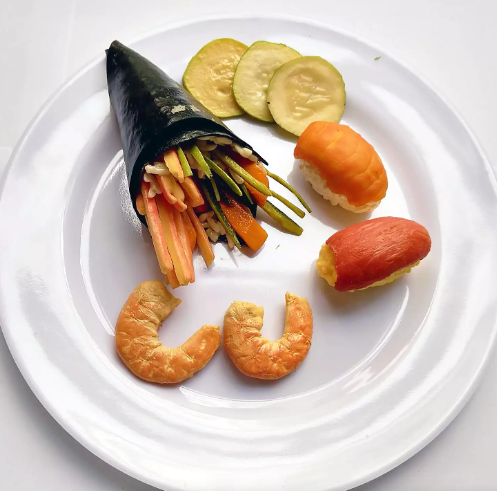

In [40]:
import PIL.Image

img = PIL.Image.open('/home/flaviogaspareto/documents/vscode/NutriAI/image.png')
img

In [41]:
model = genai.GenerativeModel('gemini-pro-vision')


In [69]:
response = model.generate_content(
    ["Responda em json. Me diga todos os macros nutrientes (calorias, proteinas, carboidratos, gorduras e fibra alimentar) dos alimentos que estao na imagem, discriminando cada alimento e seus valores", img],
    generation_config=genai.types.GenerationConfig(
        # Only one candidate for now.
        # candidate_count=1,
        # stop_sequences=['x'],
        # max_output_tokens=20,
        temperature=0
    )
)
response.resolve()

In [70]:
to_markdown(response.text)

>  ```json
> {
>   "alimentos": [
>     {
>       "nome": "atum",
>       "calorias": 109,
>       "proteinas": 25,
>       "carboidratos": 0,
>       "gorduras": 5,
>       "fibra alimentar": 0
>     },
>     {
>       "nome": "salmão",
>       "calorias": 208,
>       "proteinas": 25,
>       "carboidratos": 0,
>       "gorduras": 12,
>       "fibra alimentar": 0
>     },
>     {
>       "nome": "camarão",
>       "calorias": 99,
>       "proteinas": 20,
>       "carboidratos": 1,
>       "gorduras": 1,
>       "fibra alimentar": 0
>     },
>     {
>       "nome": "pepino",
>       "calorias": 16,
>       "proteinas": 0,
>       "carboidratos": 4,
>       "gorduras": 0,
>       "fibra alimentar": 0
>     },
>     {
>       "nome": "abobrinha",
>       "calorias": 17,
>       "proteinas": 1,
>       "carboidratos": 3,
>       "gorduras": 0,
>       "fibra alimentar": 1
>     },
>     {
>       "nome": "cenoura",
>       "calorias": 40,
>       "proteinas": 1,
>       "carboidratos": 7,
>       "gorduras": 0,
>       "fibra alimentar": 2
>     },
>     {
>       "nome": "arroz",
>       "calorias": 130,
>       "proteinas": 2,
>       "carboidratos": 28,
>       "gorduras": 0,
>       "fibra alimentar": 0
>     },
>     {
>       "nome": "nori",
>       "calorias": 9,
>       "proteinas": 1,
>       "carboidratos": 1,
>       "gorduras": 0,
>       "fibra alimentar": 0
>     }
>   ]
> }
> ```

In [ ]:
# Cone de sushi

# Calorias: 280 Proteínas: 10g Carboidratos: 40g Gorduras: 10g Fibra alimentar: 2g

# Sushi de salmão

# Calorias: 150 Proteínas: 15g Carboidratos: 20g Gorduras: 5g Fibra alimentar: 1g

# Sushi de camarão

# Calorias: 180 Proteínas: 20g Carboidratos: 15g Gorduras: 8g Fibra alimentar: 1g

# Pepino

# Calorias: 10 Proteínas: 1g Carboidratos: 2g Gorduras: 0g Fibra alimentar: 1g

# Total

# Calorias: 620 Proteínas: 56g Carboidratos: 77g Gorduras: 23g Fibra alimentar: 5g

In [ ]:
# Cone de sushi

# Calorias: 280 Proteínas: 10g Carboidratos: 40g Gorduras: 10g Fibra alimentar: 2g

# Sushi de salmão

# Calorias: 150 Proteínas: 15g Carboidratos: 20g Gorduras: 5g Fibra alimentar: 1g

# Sushi de camarão

# Calorias: 180 Proteínas: 20g Carboidratos: 15g Gorduras: 8g Fibra alimentar: 1g

# Pepino

# Calorias: 10 Proteínas: 1g Carboidratos: 2g Gorduras: 0g Fibra alimentar: 1g

# Total

# Calorias: 620 Proteínas: 56g Carboidratos: 77g Gorduras: 23g Fibra alimentar: 5g

In [27]:
model = genai.GenerativeModel('gemini-pro')
chat = model.start_chat(history=[])
chat

ChatSession(
    model=genai.GenerativeModel(
        model_name='models/gemini-pro',
        generation_config={},
        safety_settings={},
        tools=None,
        system_instruction=None,
    ),
    history=[]
)

In [28]:
response = chat.send_message("Crie uma tabela nutricional com calorias, proteinas, carboidratos, gorduras e fibra alimentar de 100 alimentos comuns")
to_markdown(response.text)

> | Alimento | Calorias | Proteínas (g) | Carboidratos (g) | Gorduras (g) | Fibra Alimentar (g) |
> |---|---|---|---|---|---|
> | **Frutas** | | | | | |
> | Maçã (1 média) | 95 | 0,5 | 25 | 0,3 | 4,4 |
> | Banana (1 média) | 105 | 1,3 | 27 | 0,4 | 3,1 |
> | Laranja (1 média) | 62 | 1 | 15 | 0,2 | 3,1 |
> | Uva (1 xícara) | 129 | 1,1 | 34 | 0 | 1,4 |
> | Morango (1 xícara) | 56 | 0,7 | 12 | 0,4 | 2 |
> | **Vegetais** | | | | | |
> | Brócolis (1 xícara cozido) | 31 | 2,6 | 6 | 0,4 | 2,6 |
> | Cenoura (1 xícara crua) | 52 | 1,2 | 12 | 0,2 | 3,6 |
> | Espinafre (1 xícara cozido) | 7 | 0,8 | 1 | 0,4 | 0,7 |
> | Tomate (1 médio) | 32 | 1,1 | 7 | 0,2 | 1,2 |
> | Batata (1 média cozida) | 110 | 2,5 | 26 | 0,1 | 2,3 |
> | **Laticínios** | | | | | |
> | Leite (1 xícara) | 122 | 8 | 12 | 8 | 0 |
> | Iogurte (1 xícara) | 150 | 11 | 17 | 3,5 | 0 |
> | Queijo cheddar (1 onça) | 113 | 7 | 1 | 9 | 0 |
> | Queijo cottage (1/2 xícara) | 80 | 11 | 5 | 2 | 0 |
> | Sorvete (1/2 xícara) | 145 | 3 | 21 | 8 | 0 |
> | **Proteínas** | | | | | |
> | Ovo (1 grande) | 78 | 6 | 0,5 | 5 | 0 |
> | Frango (100g cozido) | 165 | 27 | 0 | 5 | 0 |
> | Peixe (100g cozido) | 155 | 23 | 0 | 5 | 0 |
> | Feijão (1 xícara cozido) | 225 | 15 | 40 | 1 | 13 |
> | Tofu (100g) | 70 | 8 | 2 | 4 | 2 |
> | **Carboidratos** | | | | | |
> | Arroz (1 xícara cozido) | 242 | 4 | 53 | 0,4 | 0,6 |
> | Massa (1 xícara cozida) | 221 | 8 | 43 | 2 | 2,5 |
> | Pão integral (1 fatia) | 70 | 3 | 14 | 1 | 2,5 |
> | Aveia (1/2 xícara seca) | 150 | 5 | 27 | 2,5 | 4 |
> | Batata doce (1 média cozida) | 103 | 2 | 23 | 0,1 | 2,5 |
> | **Gorduras** | | | | | |
> | Azeite (1 colher de sopa) | 119 | 0 | 0 | 14 | 0 |
> | Manteiga (1 colher de sopa) | 102 | 0 | 0 | 11 | 0 |
> | Abacate (1/2 médio) | 160 | 2 | 9 | 15 | 10 |
> | Nozes (1 onça) | 160 | 6 | 6 | 14 | 2 |
> | Sementes de chia (1 colher de sopa) | 137 | 4 | 12 | 9 | 10 |

In [29]:
chat.history

[parts {
   text: "Crie uma tabela nutricional com calorias, proteinas, carboidratos, gorduras e fibra alimentar de 100 alimentos comuns"
 }
 role: "user",
 parts {
   text: "| Alimento | Calorias | Proteínas (g) | Carboidratos (g) | Gorduras (g) | Fibra Alimentar (g) |\n|---|---|---|---|---|---|\n| **Frutas** | | | | | |\n| Maçã (1 média) | 95 | 0,5 | 25 | 0,3 | 4,4 |\n| Banana (1 média) | 105 | 1,3 | 27 | 0,4 | 3,1 |\n| Laranja (1 média) | 62 | 1 | 15 | 0,2 | 3,1 |\n| Uva (1 xícara) | 129 | 1,1 | 34 | 0 | 1,4 |\n| Morango (1 xícara) | 56 | 0,7 | 12 | 0,4 | 2 |\n| **Vegetais** | | | | | |\n| Brócolis (1 xícara cozido) | 31 | 2,6 | 6 | 0,4 | 2,6 |\n| Cenoura (1 xícara crua) | 52 | 1,2 | 12 | 0,2 | 3,6 |\n| Espinafre (1 xícara cozido) | 7 | 0,8 | 1 | 0,4 | 0,7 |\n| Tomate (1 médio) | 32 | 1,1 | 7 | 0,2 | 1,2 |\n| Batata (1 média cozida) | 110 | 2,5 | 26 | 0,1 | 2,3 |\n| **Laticínios** | | | | | |\n| Leite (1 xícara) | 122 | 8 | 12 | 8 | 0 |\n| Iogurte (1 xícara) | 150 | 11 | 17 | 3,5 | 

In [30]:
response = chat.send_message("Okay, agora gere mais alguns outros alimentos", stream=True)

for chunk in response:
  print(chunk.text)
  print("_"*80)

| Alimento | Calorias | Proteínas (g) | Carboidratos
________________________________________________________________________________
 (g) | Gorduras (g) | Fibra Alimentar (g) |
|---|---|---|---|---|---|
| **Frutas** | | |
________________________________________________________________________________
 | | |
| Abacaxi (1 xícara) | 82 | 1 | 21 | 0,2 | 2,3 |
| Amora (1 xícara) | 62 | 1,4 | 14 | 0,5 | 8 |
________________________________________________________________________________

| Manga (1 xícara) | 101 | 1,4 | 25 | 0,6 | 2,6 |
| Kiwi (1 médio) | 42 | 0,8 | 10 | 0,4 | 2,1 |
| Pêssego (1 médio) | 59 | 1 | 14 | 0,3 | 2,3 |
| **Vegetais** | | | | | |
| Couve-flor (1 xícara cozida) | 25 | 2 | 5
________________________________________________________________________________
 | 0,3 | 2,5 |
| Cogumelo (1 xícara cozido) | 15 | 3 | 3 | 0,2 | 2 |
| Cebola (1/2 xícara picada) | 20 | 1 | 5 | 0 | 1,7 |
| Abóbora (1 xícara cozida) | 49 | 2 | 12 | 0,1 | 2,7 |
| Aspargos (1 xícara cozido) | 20 |

In [31]:
for message in chat.history:
  display(to_markdown(f'**{message.role}**: {message.parts[0].text}'))

> **user**: Crie uma tabela nutricional com calorias, proteinas, carboidratos, gorduras e fibra alimentar de 100 alimentos comuns

> **model**: | Alimento | Calorias | Proteínas (g) | Carboidratos (g) | Gorduras (g) | Fibra Alimentar (g) |
> |---|---|---|---|---|---|
> | **Frutas** | | | | | |
> | Maçã (1 média) | 95 | 0,5 | 25 | 0,3 | 4,4 |
> | Banana (1 média) | 105 | 1,3 | 27 | 0,4 | 3,1 |
> | Laranja (1 média) | 62 | 1 | 15 | 0,2 | 3,1 |
> | Uva (1 xícara) | 129 | 1,1 | 34 | 0 | 1,4 |
> | Morango (1 xícara) | 56 | 0,7 | 12 | 0,4 | 2 |
> | **Vegetais** | | | | | |
> | Brócolis (1 xícara cozido) | 31 | 2,6 | 6 | 0,4 | 2,6 |
> | Cenoura (1 xícara crua) | 52 | 1,2 | 12 | 0,2 | 3,6 |
> | Espinafre (1 xícara cozido) | 7 | 0,8 | 1 | 0,4 | 0,7 |
> | Tomate (1 médio) | 32 | 1,1 | 7 | 0,2 | 1,2 |
> | Batata (1 média cozida) | 110 | 2,5 | 26 | 0,1 | 2,3 |
> | **Laticínios** | | | | | |
> | Leite (1 xícara) | 122 | 8 | 12 | 8 | 0 |
> | Iogurte (1 xícara) | 150 | 11 | 17 | 3,5 | 0 |
> | Queijo cheddar (1 onça) | 113 | 7 | 1 | 9 | 0 |
> | Queijo cottage (1/2 xícara) | 80 | 11 | 5 | 2 | 0 |
> | Sorvete (1/2 xícara) | 145 | 3 | 21 | 8 | 0 |
> | **Proteínas** | | | | | |
> | Ovo (1 grande) | 78 | 6 | 0,5 | 5 | 0 |
> | Frango (100g cozido) | 165 | 27 | 0 | 5 | 0 |
> | Peixe (100g cozido) | 155 | 23 | 0 | 5 | 0 |
> | Feijão (1 xícara cozido) | 225 | 15 | 40 | 1 | 13 |
> | Tofu (100g) | 70 | 8 | 2 | 4 | 2 |
> | **Carboidratos** | | | | | |
> | Arroz (1 xícara cozido) | 242 | 4 | 53 | 0,4 | 0,6 |
> | Massa (1 xícara cozida) | 221 | 8 | 43 | 2 | 2,5 |
> | Pão integral (1 fatia) | 70 | 3 | 14 | 1 | 2,5 |
> | Aveia (1/2 xícara seca) | 150 | 5 | 27 | 2,5 | 4 |
> | Batata doce (1 média cozida) | 103 | 2 | 23 | 0,1 | 2,5 |
> | **Gorduras** | | | | | |
> | Azeite (1 colher de sopa) | 119 | 0 | 0 | 14 | 0 |
> | Manteiga (1 colher de sopa) | 102 | 0 | 0 | 11 | 0 |
> | Abacate (1/2 médio) | 160 | 2 | 9 | 15 | 10 |
> | Nozes (1 onça) | 160 | 6 | 6 | 14 | 2 |
> | Sementes de chia (1 colher de sopa) | 137 | 4 | 12 | 9 | 10 |

> **user**: Okay, agora gere mais alguns outros alimentos

> **model**: | Alimento | Calorias | Proteínas (g) | Carboidratos (g) | Gorduras (g) | Fibra Alimentar (g) |
> |---|---|---|---|---|---|
> | **Frutas** | | | | | |
> | Abacaxi (1 xícara) | 82 | 1 | 21 | 0,2 | 2,3 |
> | Amora (1 xícara) | 62 | 1,4 | 14 | 0,5 | 8 |
> | Manga (1 xícara) | 101 | 1,4 | 25 | 0,6 | 2,6 |
> | Kiwi (1 médio) | 42 | 0,8 | 10 | 0,4 | 2,1 |
> | Pêssego (1 médio) | 59 | 1 | 14 | 0,3 | 2,3 |
> | **Vegetais** | | | | | |
> | Couve-flor (1 xícara cozida) | 25 | 2 | 5 | 0,3 | 2,5 |
> | Cogumelo (1 xícara cozido) | 15 | 3 | 3 | 0,2 | 2 |
> | Cebola (1/2 xícara picada) | 20 | 1 | 5 | 0 | 1,7 |
> | Abóbora (1 xícara cozida) | 49 | 2 | 12 | 0,1 | 2,7 |
> | Aspargos (1 xícara cozido) | 20 | 2,9 | 3 | 0,2 | 2,1 |
> | **Laticínios** | | | | | |
> | Queijo parmesão (1/4 xícara ralado) | 110 | 10 | 3 | 7 | 0 |
> | Queijo feta (1/2 xícara) | 150 | 14 | 4 | 10 | 0 |
> | Leite de amêndoa (1 xícara) | 39 | 1 | 8 | 2,5 | 0 |
> | Iogurte grego (1 xícara) | 150 | 20 | 8 | 3 | 0 |
> | Queijo ricota (1/2 xícara) | 110 | 11 | 5 | 4 | 0 |
> | **Proteínas** | | | | | |
> | Camarão (100g cozido) | 99 | 19 | 1 | 1 | 0 |
> | Peru (100g cozido) | 165 | 29 | 0 | 6 | 0 |
> | Atum (100g enlatado) | 184 | 29 | 0 | 1 | 0 |
> | Lentilha (1 xícara cozida) | 230 | 18 | 40 | 0,8 | 16 |
> | Amêndoa (1 onça) | 162 | 6 | 6 | 14 | 3,5 |
> | **Carboidratos** | | | | | |
> | Quinoa (1 xícara cozida) | 222 | 8 | 40 | 4 | 5 |
> | Pipoca (3 xícaras estouradas) | 93 | 3 | 18 | 1 | 4 |
> | Arroz integral (1 xícara cozido) | 216 | 5 | 45 | 2 | 3,5 |
> | Batata assada (1 média) | 161 | 4 | 37 | 0,2 | 4,1 |
> | Tortilha (1 pequena) | 160 | 5 | 30 | 5 | 5 |
> | **Gorduras** | | | | | |
> | Azeitonas (10) | 115 | 1 | 6 | 10 | 3,5 |
> | Abacate (1/2 médio) | 160 | 2 | 9 | 15 | 10 |
> | Semente de girassol (1/4 xícara) | 165 | 5 | 6 | 16 | 3 |
> | Manteiga de amendoim (2 colheres de sopa) | 190 | 8 | 7 | 16 | 2 |
> | Azeite de oliva extra virgem (1 colher de sopa) | 119 | 0 | 0 | 14 | 0 |

In [32]:
model.count_tokens("What is the meaning of life?")

total_tokens: 7

In [33]:
model.count_tokens(chat.history)

total_tokens: 2124

In [34]:
result = genai.embed_content(
    model="models/embedding-001",
    content="What is the meaning of life?",
    task_type="retrieval_document",
    title="Embedding of single string")

# 1 input > 1 vector output
print(str(result['embedding'])[:50], '... TRIMMED]')

[-0.003216741, -0.013358698, -0.017649598, -0.0091 ... TRIMMED]


In [35]:
result = genai.embed_content(
    model="models/embedding-001",
    content=[
      'What is the meaning of life?',
      'How much wood would a woodchuck chuck?',
      'How does the brain work?'],
    task_type="retrieval_document",
    title="Embedding of list of strings")

# A list of inputs > A list of vectors output
for v in result['embedding']:
  print(str(v)[:50], '... TRIMMED ...')

[0.0040260437, 0.004124458, -0.014209415, -0.00183 ... TRIMMED ...
[-0.004049845, -0.0075574904, -0.0073463684, -0.03 ... TRIMMED ...
[0.025310587, -0.0080734305, -0.029902633, 0.01160 ... TRIMMED ...


In [36]:
response.candidates[0].content

parts {
  text: "| Alimento | Calorias | Proteínas (g) | Carboidratos (g) | Gorduras (g) | Fibra Alimentar (g) |\n|---|---|---|---|---|---|\n| **Frutas** | | | | | |\n| Abacaxi (1 xícara) | 82 | 1 | 21 | 0,2 | 2,3 |\n| Amora (1 xícara) | 62 | 1,4 | 14 | 0,5 | 8 |\n| Manga (1 xícara) | 101 | 1,4 | 25 | 0,6 | 2,6 |\n| Kiwi (1 médio) | 42 | 0,8 | 10 | 0,4 | 2,1 |\n| Pêssego (1 médio) | 59 | 1 | 14 | 0,3 | 2,3 |\n| **Vegetais** | | | | | |\n| Couve-flor (1 xícara cozida) | 25 | 2 | 5 | 0,3 | 2,5 |\n| Cogumelo (1 xícara cozido) | 15 | 3 | 3 | 0,2 | 2 |\n| Cebola (1/2 xícara picada) | 20 | 1 | 5 | 0 | 1,7 |\n| Abóbora (1 xícara cozida) | 49 | 2 | 12 | 0,1 | 2,7 |\n| Aspargos (1 xícara cozido) | 20 | 2,9 | 3 | 0,2 | 2,1 |\n| **Laticínios** | | | | | |\n| Queijo parmesão (1/4 xícara ralado) | 110 | 10 | 3 | 7 | 0 |\n| Queijo feta (1/2 xícara) | 150 | 14 | 4 | 10 | 0 |\n| Leite de amêndoa (1 xícara) | 39 | 1 | 8 | 2,5 | 0 |\n| Iogurte grego (1 xícara) | 150 | 20 | 8 | 3 | 0 |\n| Queijo ricota (

In [37]:
result = genai.embed_content(
    model = 'models/embedding-001',
    content = response.candidates[0].content)

# 1 input > 1 vector output
print(str(result['embedding'])[:50], '... TRIMMED ...')

[-0.017727634, -0.010775981, -0.059477534, 0.00365 ... TRIMMED ...


In [38]:
result = genai.embed_content(
    model = 'models/embedding-001',
    content = chat.history)

# 1 input > 1 vector output
for i,v in enumerate(result['embedding']):
  print(str(v)[:50], '... TRIMMED...')

[-0.007946292, -0.04082171, -0.02384458, 0.0167743 ... TRIMMED...
[-0.029687854, 0.00031153698, -0.04381524, 0.00648 ... TRIMMED...
[0.0038060104, -0.021525463, -0.02962296, -0.02330 ... TRIMMED...
[-0.017727634, -0.010775981, -0.059477534, 0.00365 ... TRIMMED...


In [ ]:
model = genai.GenerativeModel('gemini-pro')
response = model.generate_content(
    'Tell me a story about a magic backpack.',
    generation_config=genai.types.GenerationConfig(
        # Only one candidate for now.
        candidate_count=1,
        stop_sequences=['x'],
        max_output_tokens=20,
        temperature=1.0)
)

In [ ]:
text = response.text

if response.candidates[0].finish_reason.name == "MAX_TOKENS":
    text += '...'

to_markdown(text)